<ipython-input-1-276ed040e31f>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'Year': pd.date_range(start='2000', periods=21, freq='Y'),
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting paramet

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -58.508
Date:                Mon, 05 May 2025   AIC                            123.016
Time:                        12:04:32   BIC                            126.003
Sample:                    12-31-2000   HQIC                           123.599
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9982      0.008    126.960      0.000       0.983       1.014
ma.L1         -0.6116      0.160     -3.834      0.000      -0.924      -0.299
sigma2        16.4993      6.272      2.631      0.0

<ipython-input-1-276ed040e31f>:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')


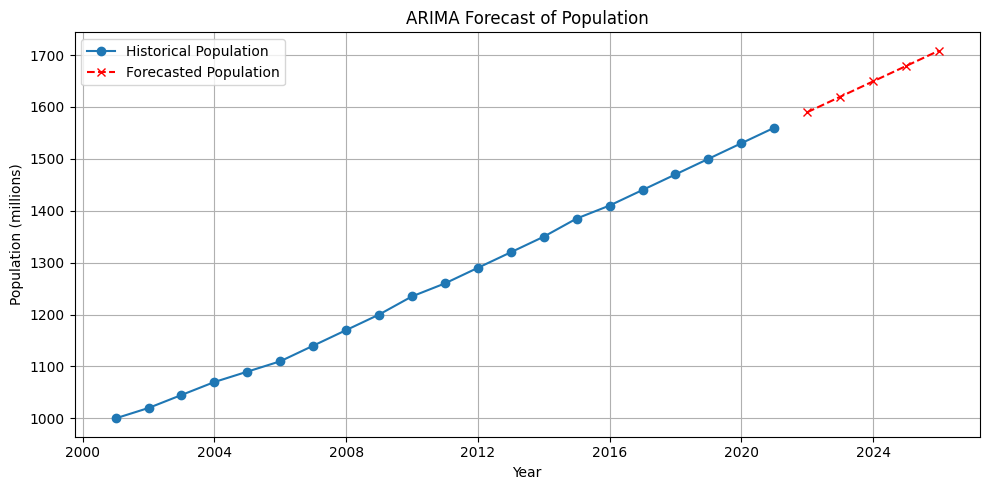

In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Sample population dataset (Year vs Population in millions)
data = {
    'Year': pd.date_range(start='2000', periods=21, freq='Y'),
    'Population': [1000, 1020, 1045, 1070, 1090, 1110, 1140, 1170, 1200, 1235,
                   1260, 1290, 1320, 1350, 1385, 1410, 1440, 1470, 1500, 1530, 1560]
}

df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Fit ARIMA model (p=1, d=1, q=1) – you can tune this
model = ARIMA(df['Population'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next 5 years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
forecast_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

# Plot original data and forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Population'], label='Historical Population', marker='o')
plt.plot(forecast_years, forecast, label='Forecasted Population', marker='x', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('ARIMA Forecast of Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()